<a href="https://colab.research.google.com/github/thanhtung386/gesture_speaker/blob/main/Gesture_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!ls ~/.kaggle
!chmod 600 /root/.kaggle/kaggle.json
!kaggle datasets download -d tranthanhtung2002/gesture
!unzip /content/gesture
!rm /content/gesture

Streaming output truncated to the last 5000 lines.
  inflating: leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0002.png  
  inflating: leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0003.png  
  inflating: leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0004.png  
  inflating: leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0005.png  
  inflating: leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0006.png  
  inflating: leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0007.png  
  inflating: leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0008.png  
  inflating: leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0009.png  
  inflating: leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0010.png  
  inflating: leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0011.png  
  inflating: leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0012.png  
  inflating: leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0013.png  
  inflating: leapgestrecog/leapGestRe

In [316]:
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import numpy as np
import cv2

import warnings
warnings.filterwarnings('ignore')

from tensorflow import keras
from keras import layers,models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.preprocessing import image_dataset_from_directory

import os
import matplotlib.image as mpimg

In [ ]:
# path = '/content/leapGestRecog/00'
# classes = os.listdir(path)
# classes


**Generate a Dataset**

In [271]:
train = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255)

tran_ds1 = train.flow_from_directory(
    "/content/leapGestRecog/03",
    target_size = (240,640),
    batch_size = 32,
    class_mode = 'categorical',
    color_mode = 'grayscale'
)
val = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255)
val_ds1 = val.flow_from_directory(
    "/content/leapGestRecog/07",
    target_size = (240,640),
    batch_size = 32,
    class_mode = 'categorical',
    color_mode = 'grayscale'
)

Found 2000 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.


In [272]:
tran_ds1.class_indices

{'01_palm': 0,
 '02_l': 1,
 '03_fist': 2,
 '04_fist_moved': 3,
 '05_thumb': 4,
 '06_index': 5,
 '07_ok': 6,
 '08_palm_moved': 7,
 '09_c': 8,
 '10_down': 9}

In [273]:
val_ds1.class_indices

{'01_palm': 0,
 '02_l': 1,
 '03_fist': 2,
 '04_fist_moved': 3,
 '05_thumb': 4,
 '06_index': 5,
 '07_ok': 6,
 '08_palm_moved': 7,
 '09_c': 8,
 '10_down': 9}

In [315]:
tran_ds1.classes

array([0, 0, 0, ..., 9, 9, 9], dtype=int32)

**Setup a model**

In [261]:
# Xây dựng mô hình CNN
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(240, 640, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

**Build model**

In [266]:
epochs = 10

callbacks = [
    keras.callbacks.ModelCheckpoint("save_at_{epoch}.keras"),
]
model.compile(
    optimizer=keras.optimizers.Adam(1e-3),
    loss="binary_crossentropy",
    metrics=["accuracy"],
)
history = model.fit(
    tran_ds1,
    epochs=epochs,
    callbacks=callbacks,
    validation_data=val_ds1,
)

Epoch 1/10
63/63 [==============================] - 24s 300ms/step - loss: 0.0811 - accuracy: 0.8755 - val_loss: 1.6342 - val_accuracy: 0.2605
Epoch 2/10
63/63 [==============================] - 21s 337ms/step - loss: 4.1278e-04 - accuracy: 1.0000 - val_loss: 1.6560 - val_accuracy: 0.1460
Epoch 3/10
63/63 [==============================] - 16s 246ms/step - loss: 5.3237e-05 - accuracy: 1.0000 - val_loss: 1.8408 - val_accuracy: 0.1890
Epoch 4/10
63/63 [==============================] - 15s 245ms/step - loss: 1.1614e-05 - accuracy: 1.0000 - val_loss: 1.9118 - val_accuracy: 0.1820
Epoch 5/10
63/63 [==============================] - 21s 331ms/step - loss: 5.4848e-06 - accuracy: 1.0000 - val_loss: 1.9729 - val_accuracy: 0.1865
Epoch 6/10
63/63 [==============================] - 16s 248ms/step - loss: 3.7470e-06 - accuracy: 1.0000 - val_loss: 2.0247 - val_accuracy: 0.1885
Epoch 7/10
63/63 [==============================] - 16s 249ms/step - loss: 2.7507e-06 - accuracy: 1.0000 - val_loss: 2.075

In [278]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 238, 638, 32)      320       
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 119, 319, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 117, 317, 64)      18496     
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 58, 158, 64)      0         
 g2D)                                                            
                                                                 
 conv2d_18 (Conv2D)          (None, 56, 156, 128)      73856     
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 28, 78, 128)     

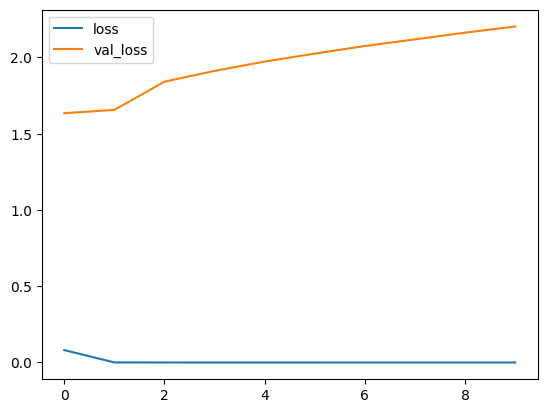

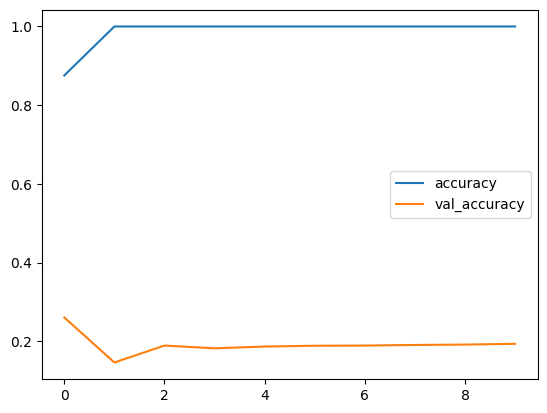

In [279]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot()
history_df.loc[:, ['accuracy', 'val_accuracy']].plot()
plt.show()

**Plot the model**

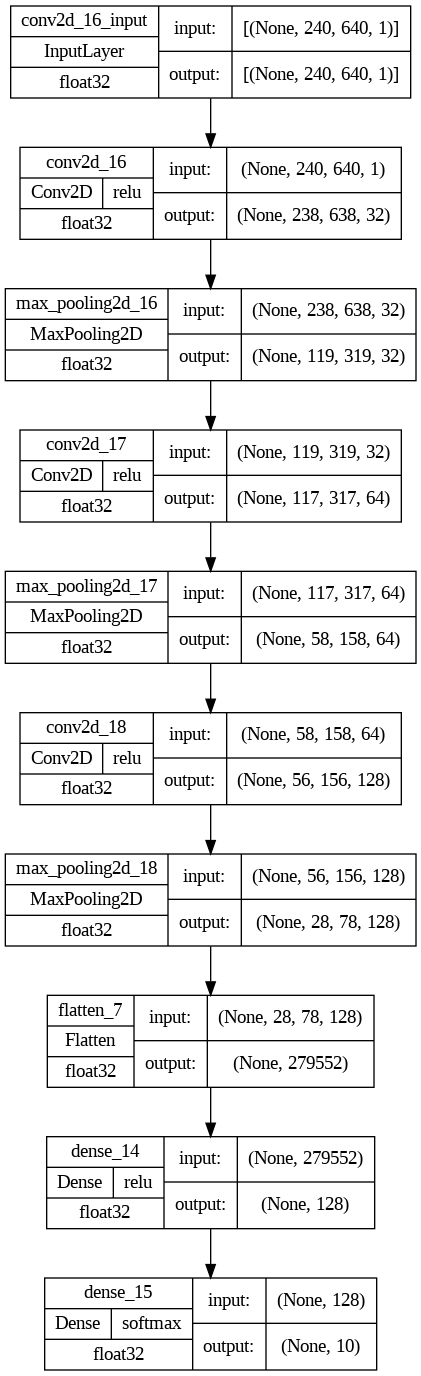

In [302]:
keras.utils.plot_model(
	model,
	show_shapes=True,
	show_dtype=True,
	show_layer_activations=True
)


**Chạy thử model với tập dữ liệu mới**

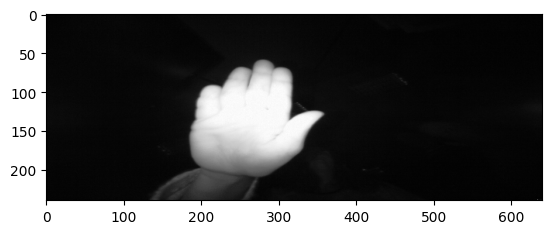

1/1 [==============================] - 0s 27ms/step
Result: 1


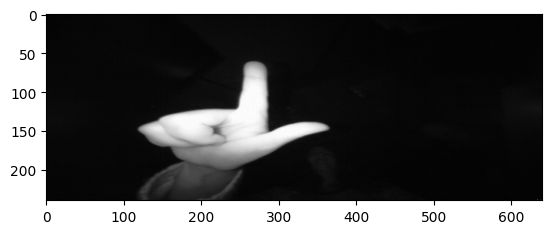

1/1 [==============================] - 0s 24ms/step
Result: 8


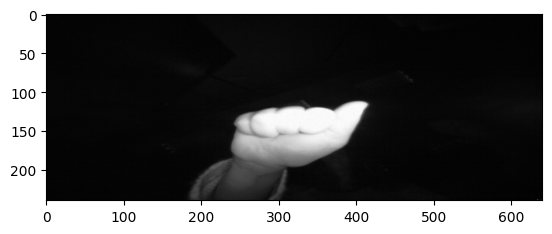

1/1 [==============================] - 0s 23ms/step
Result: 1


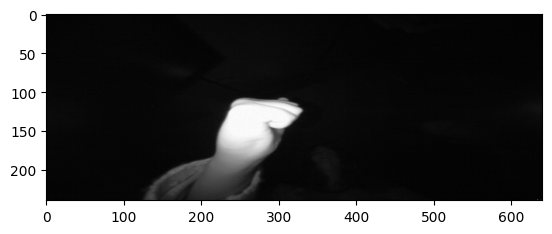

1/1 [==============================] - 0s 24ms/step
Result: 6


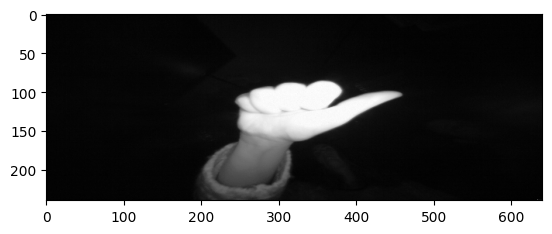

1/1 [==============================] - 0s 39ms/step
Result: 5


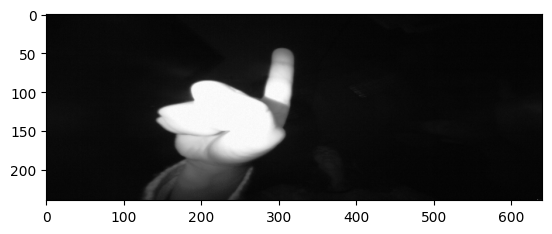

1/1 [==============================] - 0s 49ms/step
Result: 4


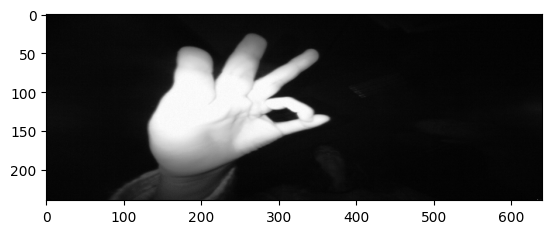

1/1 [==============================] - 0s 24ms/step
Result: 10


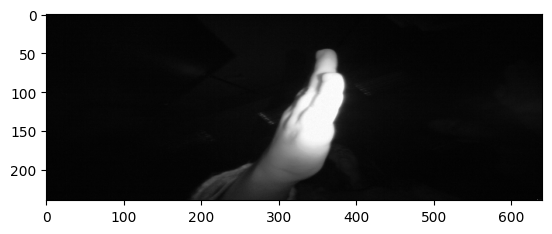

1/1 [==============================] - 0s 24ms/step
Result: 4


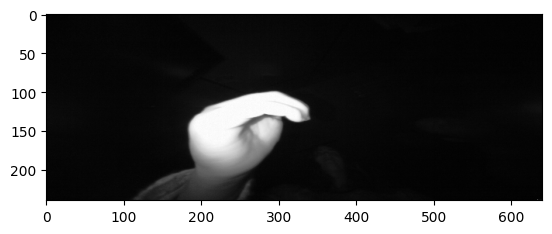

1/1 [==============================] - 0s 21ms/step
Result: 2


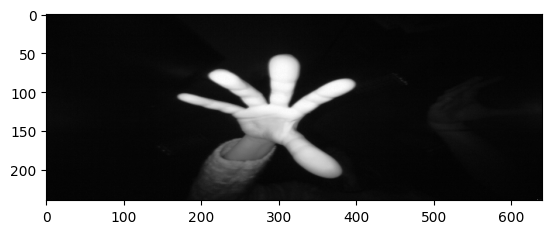

1/1 [==============================] - 0s 22ms/step
Result: 10


In [307]:
dir_path = '/content/test'
for i in range(10):
  img = tf.keras.utils.load_img(dir_path + '/' + str(i) + '.png',color_mode='grayscale')
  plt.imshow(img,cmap='gray')
  plt.show()
  x=tf.keras.utils.img_to_array(img)
  x=np.expand_dims(x,axis=0)
  images = np.vstack([x])
  val = model.predict(x)
  print(f'Result: {val.argmax() + 1}')

In [125]:
model.save("my_model.h5")

In [ ]:
cv2.imread('frame_09_01_0006.png',cv2.IMREAD_GRAYSCALE)